In [6]:
# Env: sc2_v0
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import FancyBboxPatch
import proplot as pplt # New plot library (https://proplot.readthedocs.io/en/latest/)
pplt.rc['savefig.dpi'] = 300 # 1200 is too big! #https://proplot.readthedocs.io/en/latest/basics.html#Creating-figures
from scipy import stats
import calendar
import os

/home/lalandmi/miniconda3/envs/sc2_v0/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:403: UserWarning: The `map_projection` keyword argument is deprecated, use `projection` to instantiate a GeoAxes instead.
  warnings.warn("The `map_projection` keyword argument is "


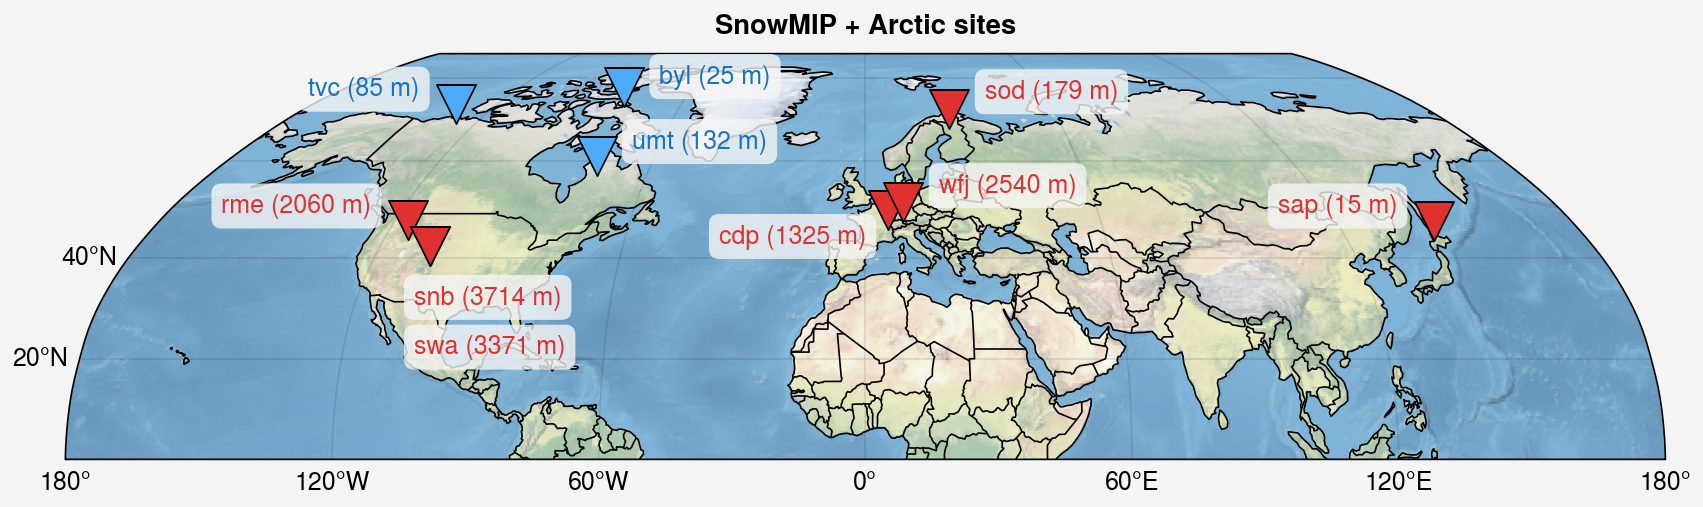

In [191]:
stations = ['cdp (1325 m)', 'rme (2060 m)', 'snb (3714 m)', 'swa (3371 m)', 'sap (15 m)', 'sod (179 m)', 'wfj (2540 m)']
lats = [45.30, 43.19, 37.91, 37.91, 43.08, 67.37, 46.83]
yf = [0.52, 0.58, 0.40, 0.302, 0.58, 0.805, 0.62]


# modify to fit the triangle edge with real sites (+ map projection error probably with robin)
lons = [5.77, -116.78, -107.73, -107.71, 145, 26.63, 9.81] 
xf = [0.422, 0.13, 0.243, 0.243, 0.75, 0.578, 0.551]


stations_arc = ['byl (25 m)', 'umt (132 m)', 'tvc (85 m)']
lats_arc = [73.150, 56.55877, 68.74]
yf_arc = [0.835, 0.707, 0.81]

# modify to fit the triangle edge with real sites (+ map projection error probably with robin)
lons_arc = [-84, -76.48234, -133.50]
xf_arc = [0.387, 0.371, 0.181]


fig, axs = pplt.subplots(proj='robin', refwidth=8)

ax = axs[0]
ax.stock_img()
ax.coastlines()

ax.format(latlim=(0,90), labels=True, borders=True)


# Plot station positions and names into the map
ax.scatter(lons, np.array(lats)+4.5, 200, color="red8", marker="v", edgecolor="k", zorder=3)
ax.scatter(lons_arc, np.array(lats_arc)+4.5, 200, color="blue4", marker="v", edgecolor="k", zorder=3)


# Annotate each point with station names
for lon, lat, x, y, name in zip(lons, lats, xf, yf, stations):
    ax.annotate(name, xy=(x, y), xycoords='figure fraction',
                bbox=dict(boxstyle="round,pad=0.4", edgecolor="none", facecolor="whitesmoke", alpha=0.8),
                fontsize=9, color='red8')

for lon, lat, x, y, name in zip(lons_arc, lats_arc, xf_arc, yf_arc, stations_arc):
    ax.annotate(name, xy=(x, y), xycoords='figure fraction',
                bbox=dict(boxstyle="round,pad=0.4", edgecolor="none", facecolor="whitesmoke", alpha=0.8),
                fontsize=9, color='blue8')


fig.suptitle('SnowMIP + Arctic sites')
fig.save('plot_sites_arc_v1.png')
fig.save('plot_sites_arc_v1.jpg')
fig.save('plot_sites_arc_v1.pdf')